In [6]:
pip install basemap-data-hires

In [7]:
pip install basemap

In [52]:
import plotly.express as px
import plotly.figure_factory as ff
import numpy as np
import pandas as pd
import geopandas as gpd
import folium as fl
import plotly.express as px
import plotly.graph_objs as go
from folium.plugins import HeatMap
from folium.plugins import PolyLineTextPath
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.offline as py
from sklearn.linear_model import LinearRegression
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [53]:
df=pd.read_csv('/content/Data Analysis project dataset (1).csv')

In [54]:
df.head()

,objectid,dc_dist,psa,dispatch_date_time,dispatch_date,dispatch_time,hour,dc_key,location_block,ucr_general,text_general_code,point_x,point_y,lat,lng
0,114,25,3,2023-03-11 17:12:00+00,3/11/2023,12:12:00,12.0,2.023250e+11,3300 BLOCK HARTVILLE ST,300,Robbery No Firearm,-75.119482,39.998927,39.998927,-75.119482
1,116,1,1,2023-03-11 18:31:00+00,3/11/2023,13:31:00,13.0,2.023010e+11,2400 BLOCK S 28TH ST,600,Theft from Vehicle,-75.193618,39.922350,39.922350,-75.193618
2,119,8,2,2023-03-11 22:13:00+00,3/11/2023,17:13:00,17.0,2.023080e+11,9800 BLOCK Roosevelt Blvd,600,Thefts,-75.015070,40.094525,40.094525,-75.015070
3,96,15,1,2023-03-11 12:42:00+00,3/11/2023,7:42:00,7.0,2.023150e+11,4700 BLOCK GRISCOM ST,600,Thefts,-75.083953,40.017896,40.017896,-75.083953
4,99,14,1,2023-03-12 00:54:00+00,3/11/2023,19:54:00,19.0,2.023140e+11,5500 BLOCK BLOYD ST,300,Robbery No Firearm,-75.161898,40.044952,40.044952,-75.161898


In [55]:
print('The shape of our training set: %s crimes and %s features'%(df.shape[0],df.shape[1]))

The shape of our training set: 639741 crimes and 15 features


In [56]:
print("Columns in our dataset: " , df.columns)

Columns in our dataset:  Index(['objectid', 'dc_dist', 'psa', 'dispatch_date_time', 'dispatch_date',
       'dispatch_time', 'hour', 'dc_key', 'location_block', 'ucr_general',
       'text_general_code', 'point_x', 'point_y', 'lat', 'lng'],
      dtype='object')


In [57]:
print("List of Numerical features: \n" , df.select_dtypes(include=np.number).columns.tolist())
print("\n\nList of Categorical features: \n" , df.select_dtypes(include=['object']).columns.tolist())

List of Numerical features: 
 ['objectid', 'dc_dist', 'hour', 'dc_key', 'ucr_general', 'point_x', 'point_y', 'lat', 'lng']


List of Categorical features: 
 ['psa', 'dispatch_date_time', 'dispatch_date', 'dispatch_time', 'location_block', 'text_general_code']


In [58]:
duplicated_objects=df.duplicated().sum()
duplicated_objects

0

In [59]:
df.isnull().sum(axis=0)

objectid                  0
dc_dist                   0
psa                     279
dispatch_date_time        0
dispatch_date             0
dispatch_time             0
hour                  17445
dc_key                    0
location_block          129
ucr_general               0
text_general_code         0
point_x                3335
point_y                3335
lat                    3335
lng                    3335
dtype: int64

In [60]:
df.dtypes

objectid                int64
dc_dist                 int64
psa                    object
dispatch_date_time     object
dispatch_date          object
dispatch_time          object
hour                  float64
dc_key                float64
location_block         object
ucr_general             int64
text_general_code      object
point_x               float64
point_y               float64
lat                   float64
lng                   float64
dtype: object

In [61]:
df.columns=df.columns.str.strip()

In [62]:
df=df.drop('dispatch_date_time',axis=1)
df.head(5)

,objectid,dc_dist,psa,dispatch_date,dispatch_time,hour,dc_key,location_block,ucr_general,text_general_code,point_x,point_y,lat,lng
0,114,25,3,3/11/2023,12:12:00,12.0,2.023250e+11,3300 BLOCK HARTVILLE ST,300,Robbery No Firearm,-75.119482,39.998927,39.998927,-75.119482
1,116,1,1,3/11/2023,13:31:00,13.0,2.023010e+11,2400 BLOCK S 28TH ST,600,Theft from Vehicle,-75.193618,39.922350,39.922350,-75.193618
2,119,8,2,3/11/2023,17:13:00,17.0,2.023080e+11,9800 BLOCK Roosevelt Blvd,600,Thefts,-75.015070,40.094525,40.094525,-75.015070
3,96,15,1,3/11/2023,7:42:00,7.0,2.023150e+11,4700 BLOCK GRISCOM ST,600,Thefts,-75.083953,40.017896,40.017896,-75.083953
4,99,14,1,3/11/2023,19:54:00,19.0,2.023140e+11,5500 BLOCK BLOYD ST,300,Robbery No Firearm,-75.161898,40.044952,40.044952,-75.161898


In [75]:
df['dispatch_date'] = pd.to_datetime(df['dispatch_date'])
df['dispatch_time'] = pd.to_datetime(df['dispatch_time'], format='%H:%M:%S')



In [76]:
na_counts=df.isna().sum()


In [77]:
df.dropna(subset=['point_x','point_y'],inplace=True)

In [78]:
na_counts

objectid                 0
dc_dist                  0
psa                    271
dispatch_date            0
dispatch_time            0
hour                 16600
dc_key                   0
location_block          60
ucr_general              0
text_general_code        0
point_x                  0
point_y                  0
lat                      0
lng                      0
dtype: int64

<Axes: >

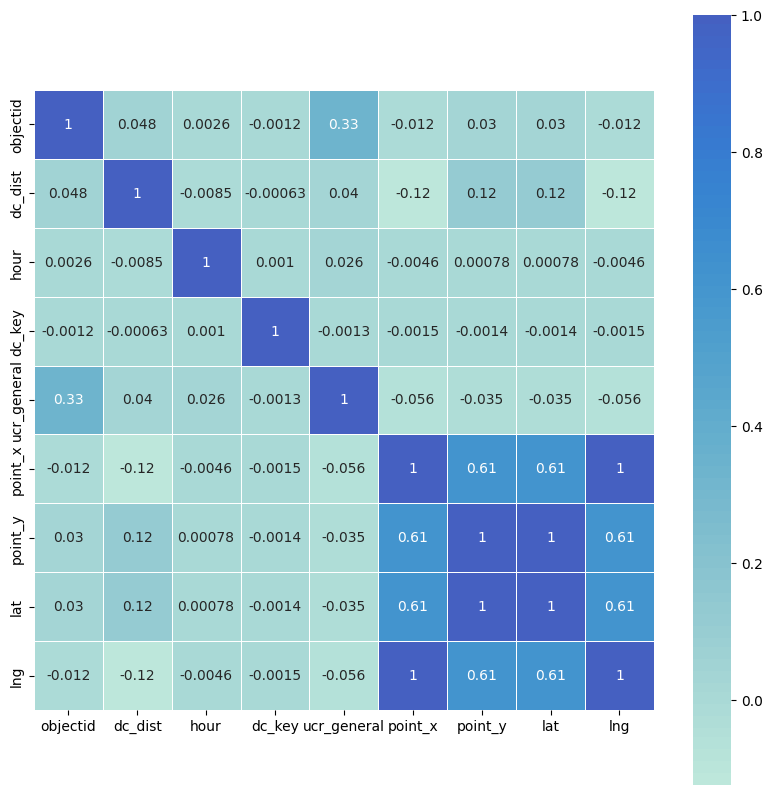

In [79]:
corr = df[['objectid', 'dc_dist', 'hour', 'dc_key', 'ucr_general', 'point_x', 'point_y', 'lat', 'lng']].corr()
f,axes = plt.subplots(1,1,figsize = (10,10))
sns.heatmap(corr,square=True,annot = True,linewidth = .4,center = 2,ax = axes)

In [80]:
df['year']=df['dispatch_date'].dt.year
crime_counts_year=df['year'].value_counts()
crime_counts_year


2019    161374
2022    150265
2020    134390
2021    134297
2023     56032
2018        48
Name: year, dtype: int64

In [81]:
df_2018=df['year'].eq(2018).sum()
df_2018

48

In [82]:
df=df[df['year']!=2018]

In [83]:
crime_counts_year=df['year'].value_counts()
crime_counts_year

2019    161374
2022    150265
2020    134390
2021    134297
2023     56032
Name: year, dtype: int64

Text(0.5, 1.0, 'Number of crimes per Year')

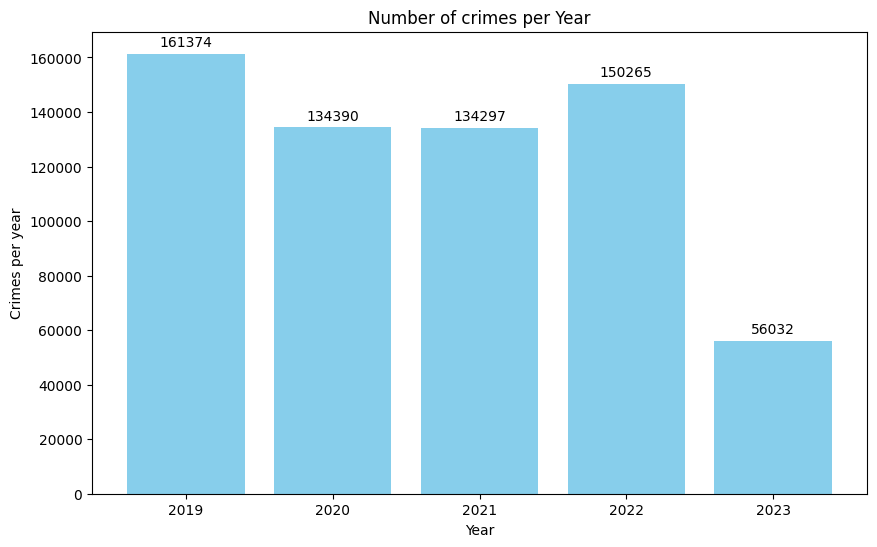

In [84]:
import matplotlib.cm as cm
plt.figure(figsize=(10,6))
bars = plt.bar(crime_counts_year.index, crime_counts_year.values, color='skyblue')

for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

plt.xlabel('Year')
plt.ylabel('Crimes per year')
plt.title('Number of crimes per Year',color='black')



**Total crime all over the years categorized**

In [85]:
violent_crimes = ['Other Assaults', 'Aggravated Assault No Firearm', 'Aggravated Assault Firearm',
                'Other Sex Offenses (Not Commercialized)', 'Rape', 'Arson',
                'Homicide - Criminal', 'Offenses Against Family and Children',
                'Homicide - Justifiable', 'Homicide - Gross Negligence', 'Robbery No Firearm',
                'Robbery Firearm']
property_crimes = ['Thefts', 'Burglary Residential', 'Burglary Non-Residential', 'Theft from Vehicle', 'Theft from Auto', 'Theft of Motor Vehicle', 'Motor Vehicle Theft', 'Receiving Stolen Property', 'Vandalism/Criminal Mischief', 'Fraud', 'Narcotic/Drug Law Violations', 'Weapon Violations', 'Forgery and Counterfeiting', 'Embezzlement', 'Prostitution and Commercialized Vice', 'Disorderly Conduct', 'Public Drunkenness', 'Liquor Law Violations', 'Gambling Violations', 'Vagrancy/Loitering']

def standardize_crime(crime):
    if crime in violent_crimes or 'Homicide' in crime:
        return 'Violent'
    elif crime in property_crimes:
        return 'Property'
    else:
        return 'Other'

df['standardized_crime'] = df['text_general_code'].apply(standardize_crime)
crime_counts = df['standardized_crime'].value_counts()
print(crime_counts)

Property    352731
Violent     178152
Other       105475
Name: standardized_crime, dtype: int64


In [86]:
df['standardized_crime'].isnull().sum()

0

In [87]:
df['dispatch_date']=pd.to_datetime(df['dispatch_date'])
df_2019=df[df['dispatch_date'].dt.year==2019]
df_2019['month']=df_2019['dispatch_date'].dt.month
crime_month2019=df_2019['month'].value_counts().sort_index()
crime_month2019


1     12018
2     10871
3     12189
4     13320
5     14452
6     14461
7     15159
8     14956
9     14597
10    14462
11    12373
12    12516
Name: month, dtype: int64

([<matplotlib.axis.XTick at 0x78a494a1c040>,
 [Text(0, 0, 'Jan'),
  Text(1, 0, 'Feb'),
  Text(2, 0, 'Mar'),
  Text(3, 0, 'Apr'),
  Text(4, 0, 'May'),
  Text(5, 0, 'Jun'),
  Text(6, 0, 'Jul'),
  Text(7, 0, 'Aug'),
  Text(8, 0, 'Sep'),
  Text(9, 0, 'Oct'),
  Text(10, 0, 'Nov'),
  Text(11, 0, 'Dec')])

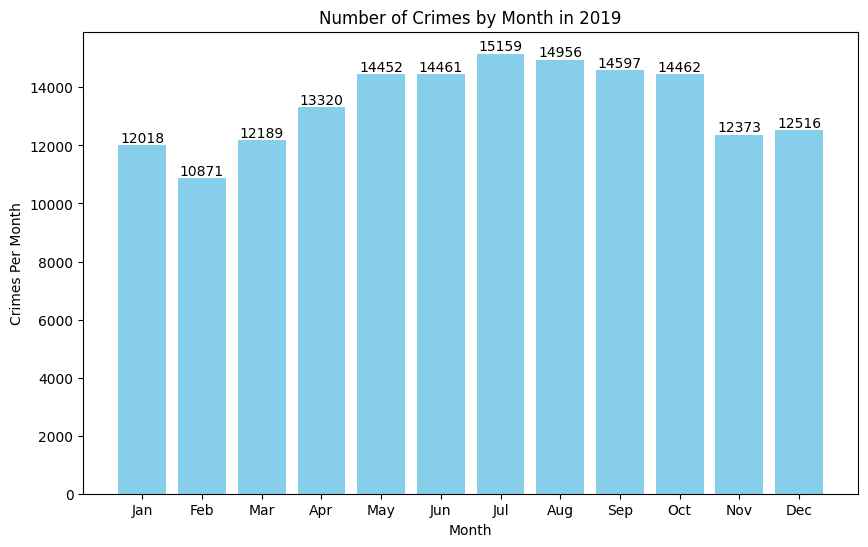

In [88]:
plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(crime_month2019)), crime_month2019.values, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Crimes Per Month')
plt.title('Number of Crimes by Month in 2019')


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)),
             ha='center', va='bottom')


month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(len(month_names)), month_names)

In [89]:
df_2019['dispatch_time'] = pd.to_datetime(df_2019['dispatch_time'], format='%H:%M:%S')
df_2019['hour']=df_2019['dispatch_time'].dt.hour

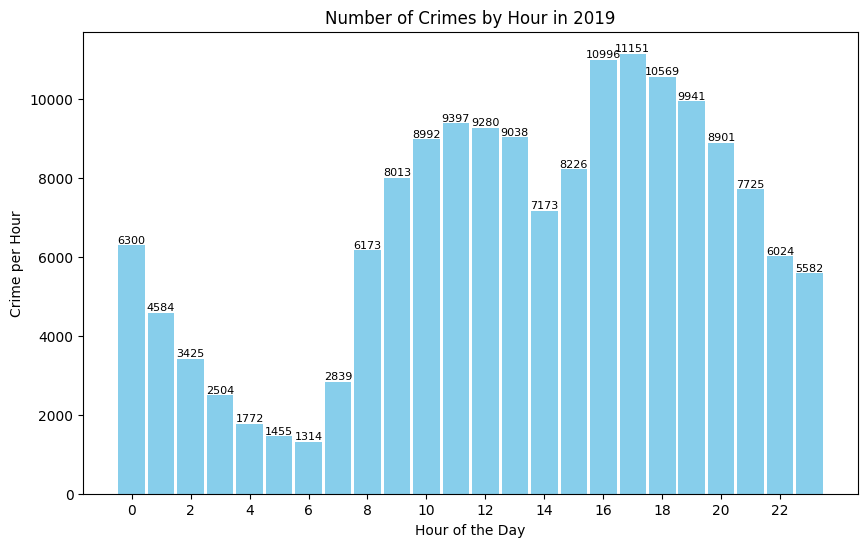

In [90]:
crime_count_by_hour=df_2019['hour'].value_counts().sort_index()
plt.figure(figsize=(10,6))


tick_locations = np.arange(0, 24, 2)

bars=plt.bar(crime_count_by_hour.index,crime_count_by_hour.values,color='skyblue',width=0.9)
plt.xlabel('Hour of the Day')
plt.ylabel('Crime per Hour')
plt.title('Number of Crimes by Hour in 2019')


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)),
             ha='center', va='bottom',fontsize=8)

plt.xticks(tick_locations)

plt.show()


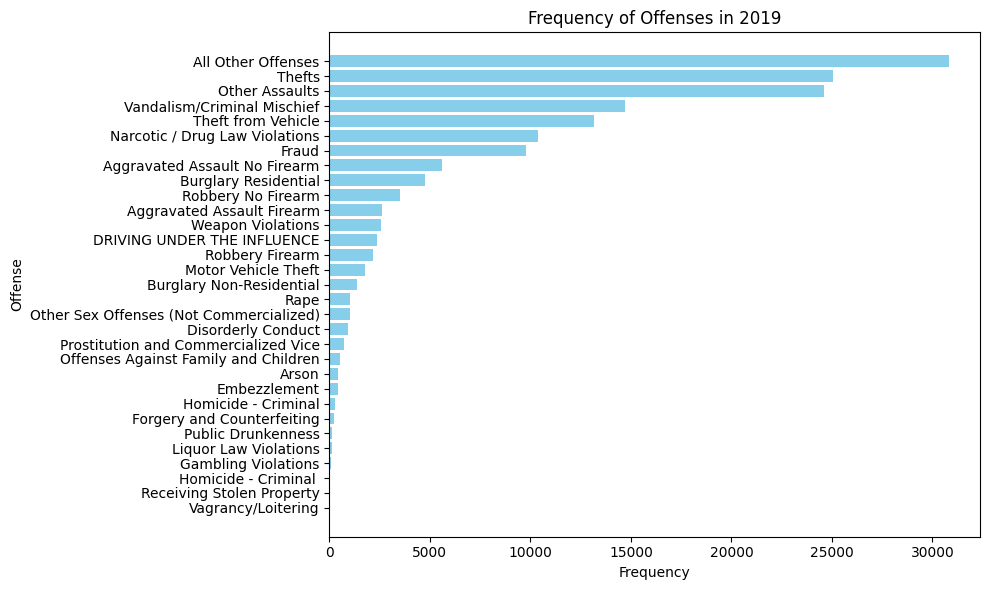

In [91]:
offense_counts = df_2019['text_general_code'].value_counts()
most_common_offense = offense_counts.idxmax()

offense_counts = offense_counts.sort_values(ascending=True)


plt.figure(figsize=(10, 6))
plt.barh(offense_counts.index, offense_counts.values, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Offense')
plt.title('Frequency of Offenses in 2019')
plt.tight_layout()
plt.show()

**Now creating a heatmap**

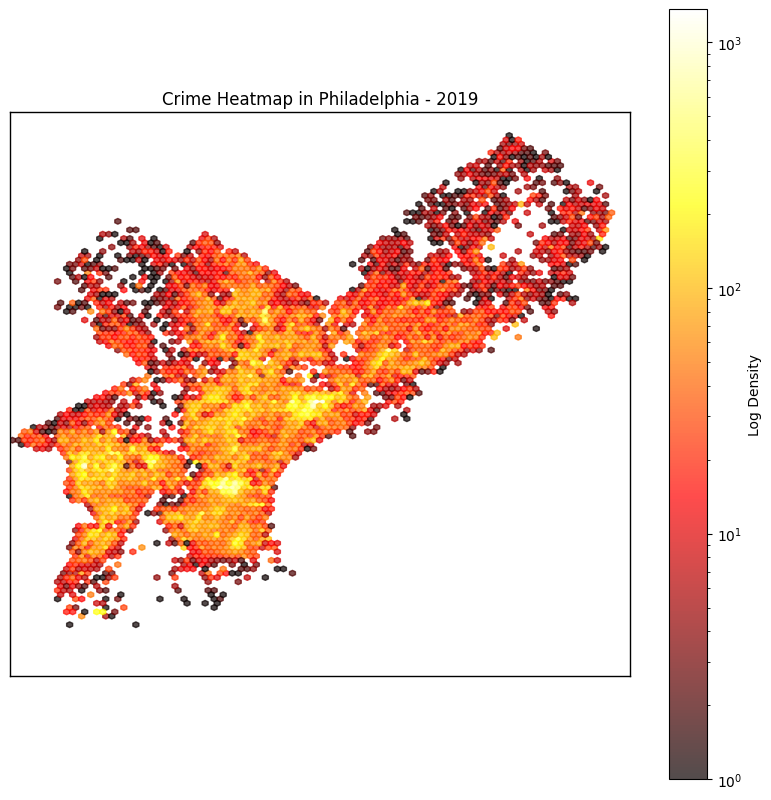

In [92]:

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap


map = Basemap(llcrnrlon=-75.28, llcrnrlat=39.85, urcrnrlon=-74.95, urcrnrlat=40.15, resolution='h')


fig, ax = plt.subplots(figsize=(10, 10))


map.drawmapboundary(fill_color='lightblue')
map.fillcontinents(color='white', lake_color='lightblue')
map.drawcoastlines()


x, y = map(df_2019['lng'].values, df_2019['lat'].values)


heatmap = ax.hexbin(x, y, gridsize=100, bins='log', cmap='hot', alpha=0.7)


colorbar = plt.colorbar(heatmap, ax=ax)
colorbar.set_label('Log Density')


plt.title('Crime Heatmap in Philadelphia - 2019')

plt.show()

In [93]:
crime_counts19=df_2019['text_general_code'].value_counts()
crime_counts19

All Other Offenses                         30828
Thefts                                     25073
Other Assaults                             24592
Vandalism/Criminal Mischief                14715
Theft from Vehicle                         13185
Narcotic / Drug Law Violations             10383
Fraud                                       9776
Aggravated Assault No Firearm               5615
Burglary Residential                        4780
Robbery No Firearm                          3498
Aggravated Assault Firearm                  2624
Weapon Violations                           2567
DRIVING UNDER THE INFLUENCE                 2351
Robbery Firearm                             2187
Motor Vehicle Theft                         1795
Burglary Non-Residential                    1355
Rape                                        1012
Other Sex Offenses (Not Commercialized)     1009
Disorderly Conduct                           941
Prostitution and Commercialized Vice         740
Offenses Against Fam

In [94]:
violent_crimes = ['Other Assaults', 'Aggravated Assault No Firearm', 'Aggravated Assault Firearm',
                'Other Sex Offenses (Not Commercialized)', 'Rape', 'Arson',
                'Homicide - Criminal', 'Offenses Against Family and Children',
                'Homicide - Justifiable', 'Homicide - Gross Negligence', 'Robbery No Firearm',
                'Robbery Firearm']
property_crimes = ['Thefts', 'Burglary Residential', 'Burglary Non-Residential', 'Theft from Vehicle', 'Theft from Auto', 'Theft of Motor Vehicle', 'Motor Vehicle Theft', 'Receiving Stolen Property', 'Vandalism/Criminal Mischief', 'Fraud', 'Narcotic/Drug Law Violations', 'Weapon Violations', 'Forgery and Counterfeiting', 'Embezzlement', 'Prostitution and Commercialized Vice', 'Disorderly Conduct', 'Public Drunkenness', 'Liquor Law Violations', 'Gambling Violations', 'Vagrancy/Loitering']

def standardize_crime(crime):
    if crime in violent_crimes or 'Homicide' in crime:
        return 'Violent'
    elif crime in property_crimes:
        return 'Property'
    else:
        return 'Other'

df_2019['standardized_crime'] = df_2019['text_general_code'].apply(standardize_crime)
crime_counts = df_2019['standardized_crime'].value_counts()
print(crime_counts)

Property    75953
Other       43562
Violent     41859
Name: standardized_crime, dtype: int64


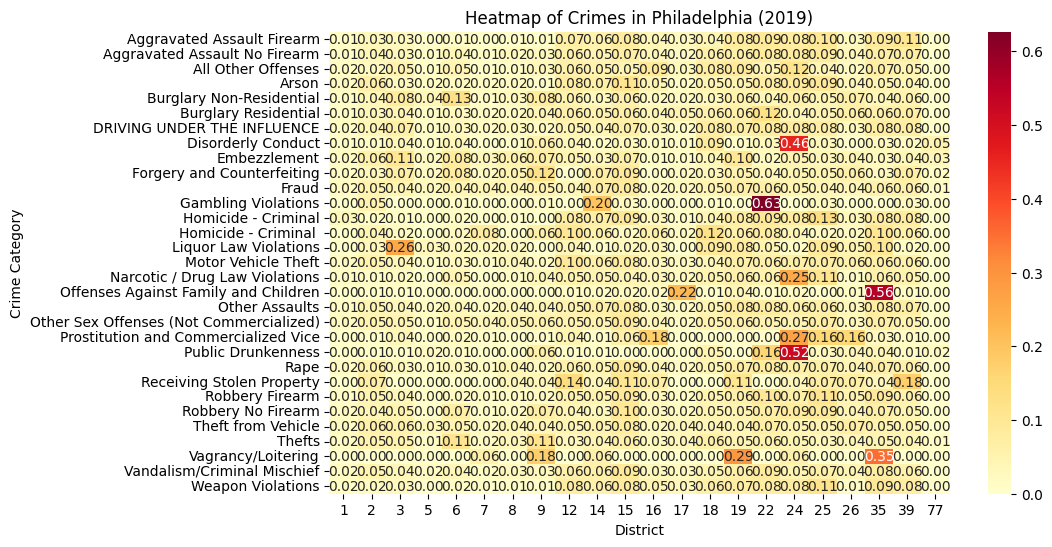

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt


crime_breakdown = df_2019.groupby('text_general_code')['dc_dist'].value_counts()


heatmap_data = crime_breakdown.unstack(fill_value=0)


heatmap_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0)


plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt='.2f')
plt.xlabel('District')
plt.ylabel('Crime Category')
plt.title('Heatmap of Crimes in Philadelphia (2019)')
plt.show()



In [96]:
df.head(5)

,objectid,dc_dist,psa,dispatch_date,dispatch_time,hour,dc_key,location_block,ucr_general,text_general_code,point_x,point_y,lat,lng,year,standardized_crime
0,114,25,3,2023-03-11,1900-01-01 12:12:00,12.0,2.023250e+11,3300 BLOCK HARTVILLE ST,300,Robbery No Firearm,-75.119482,39.998927,39.998927,-75.119482,2023,Violent
1,116,1,1,2023-03-11,1900-01-01 13:31:00,13.0,2.023010e+11,2400 BLOCK S 28TH ST,600,Theft from Vehicle,-75.193618,39.922350,39.922350,-75.193618,2023,Property
2,119,8,2,2023-03-11,1900-01-01 17:13:00,17.0,2.023080e+11,9800 BLOCK Roosevelt Blvd,600,Thefts,-75.015070,40.094525,40.094525,-75.015070,2023,Property
3,96,15,1,2023-03-11,1900-01-01 07:42:00,7.0,2.023150e+11,4700 BLOCK GRISCOM ST,600,Thefts,-75.083953,40.017896,40.017896,-75.083953,2023,Property
4,99,14,1,2023-03-11,1900-01-01 19:54:00,19.0,2.023140e+11,5500 BLOCK BLOYD ST,300,Robbery No Firearm,-75.161898,40.044952,40.044952,-75.161898,2023,Violent


**Adding police districts data also taken from philly website**

In [97]:
district_mapping = {
    35: 20,
    22: 16,
    24: 17,
    15: 11,
    25: 18,
    19: 15,
    18: 14,
    17: 13,
     9: 8,
     8: 7,
    16: 12,
    12: 9,
     5: 4,
     6: 5,
     3: 3,
     2: 2,
     1: 1,
    15: 11,
    14: 10,
    35: 2
}


df['Police_district'] = df['dc_dist'].map(district_mapping)


(df.head(10))

,objectid,dc_dist,psa,dispatch_date,dispatch_time,hour,dc_key,location_block,ucr_general,text_general_code,point_x,point_y,lat,lng,year,standardized_crime,Police_district
0,114,25,3,2023-03-11,1900-01-01 12:12:00,12.0,2.023250e+11,3300 BLOCK HARTVILLE ST,300,Robbery No Firearm,-75.119482,39.998927,39.998927,-75.119482,2023,Violent,18.0
1,116,1,1,2023-03-11,1900-01-01 13:31:00,13.0,2.023010e+11,2400 BLOCK S 28TH ST,600,Theft from Vehicle,-75.193618,39.922350,39.922350,-75.193618,2023,Property,1.0
2,119,8,2,2023-03-11,1900-01-01 17:13:00,17.0,2.023080e+11,9800 BLOCK Roosevelt Blvd,600,Thefts,-75.015070,40.094525,40.094525,-75.015070,2023,Property,7.0
3,96,15,1,2023-03-11,1900-01-01 07:42:00,7.0,2.023150e+11,4700 BLOCK GRISCOM ST,600,Thefts,-75.083953,40.017896,40.017896,-75.083953,2023,Property,11.0
4,99,14,1,2023-03-11,1900-01-01 19:54:00,19.0,2.023140e+11,5500 BLOCK BLOYD ST,300,Robbery No Firearm,-75.161898,40.044952,40.044952,-75.161898,2023,Violent,10.0
5,101,15,3,2023-03-11,1900-01-01 13:53:00,13.0,2.023150e+11,7000 BLOCK GLENLOCH ST,600,Thefts,-75.040290,40.029775,40.029775,-75.040290,2023,Property,11.0
6,102,25,3,2023-03-11,1900-01-01 02:03:00,2.0,2.023250e+11,200 BLOCK W ONTARIO ST,400,Aggravated Assault Firearm,-75.133172,40.002221,40.002221,-75.133172,2023,Violent,18.0
7,110,8,2,2023-03-11,1900-01-01 07:22:00,7.0,2.023080e+11,9900 BLOCK HEGERMAN ST,600,Theft from Vehicle,-74.981897,40.063197,40.063197,-74.981897,2023,Property,7.0
8,284,12,2,2023-02-26,1900-01-01 09:40:00,9.0,2.023120e+11,2000 BLOCK S 67TH ST,600,Thefts,-75.238846,39.925439,39.925438,-75.238846,2023,Property,9.0
9,287,19,2,2023-02-26,1900-01-01 17:52:00,17.0,2.023190e+11,5400 BLOCK LANSDOWNE AV,600,Thefts,-75.230876,39.976963,39.976963,-75.230876,2023,Property,15.0


****

In [98]:
dc_dist_counts = df['dc_dist'].value_counts()


print(dc_dist_counts)

15    46121
24    45262
22    45055
35    40513
19    39466
25    37859
12    36511
14    36288
39    35331
18    32712
6     30743
2     30341
9     28809
3     28190
26    26281
16    23625
8     20497
17    16465
7     12710
1     11301
5      9555
77     2723
Name: dc_dist, dtype: int64


**Crime in2019 per police district**

Text(0.5, 1.0, 'Number of Crimes Commited per Police District in 2019')

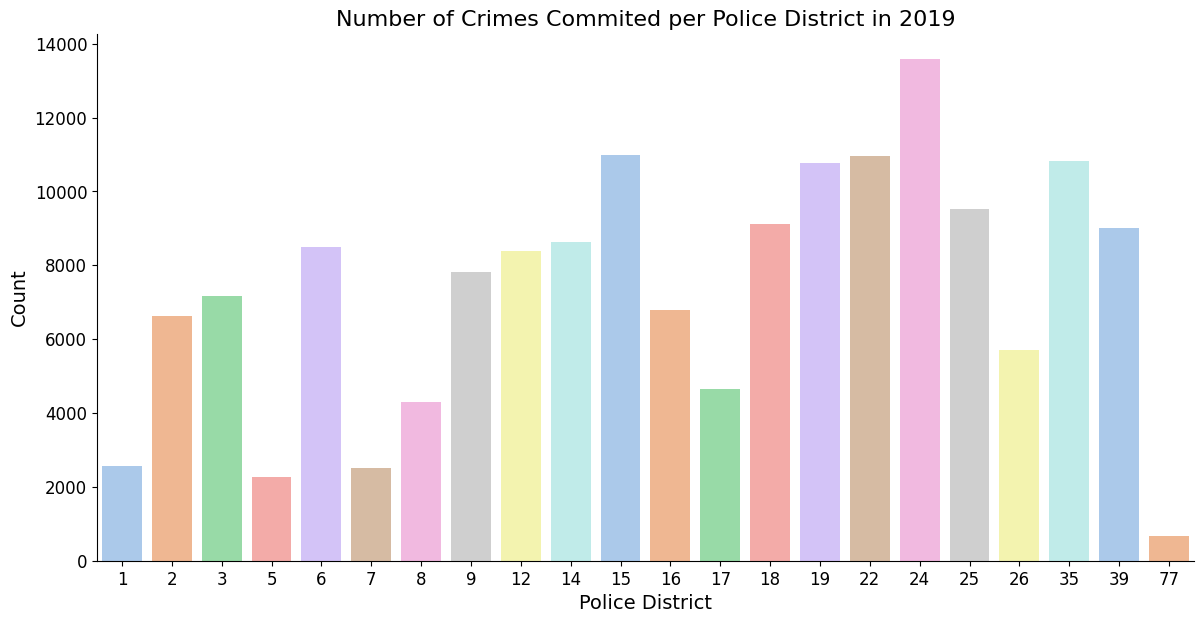

In [99]:
sns.catplot(x='dc_dist',  kind='count',height=6,aspect=2,palette=("pastel"),data=df_2019)
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel("Police District", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Number of Crimes Commited per Police District in 2019", fontsize=16)


**24th district hasthe highest crime ratio**

In [100]:
import folium


violent_crimes_df = df[df['standardized_crime'] == 'Violent']


district_violent_counts = violent_crimes_df['dc_dist'].value_counts()


most_violent_district = district_violent_counts.idxmax()

lon = df['lng']
lat = df['lat']
avgLon = sum(lon) / len(lon)
avgLat = sum(lat) / len(lat)

districts_location = df[['dc_dist', 'lng', 'lat']]
districts = districts_location.groupby(['dc_dist']).mean().reset_index()

crime_map = folium.Map(location=[avgLat, avgLon], tiles="Stamen Toner", zoom_start=11)


data_heatmap = df[-25000:]
data_heatmap = data_heatmap[['lat', 'lng']]
data_heatmap = [[row['lat'], row['lng']] for index, row in data_heatmap.iterrows()]
folium.plugins.HeatMap(data_heatmap, radius=10).add_to(crime_map)

for i in range(len(districts)):
    district_name = 'District ' + str(districts['dc_dist'][i])
    marker_icon = folium.DivIcon(html=f'<div style="font-weight: bold;">{district_name}</div>')
    folium.Marker([districts['lat'][i], districts['lng'][i]], icon=marker_icon).add_to(crime_map)


crime_map.save('crime_map.html')


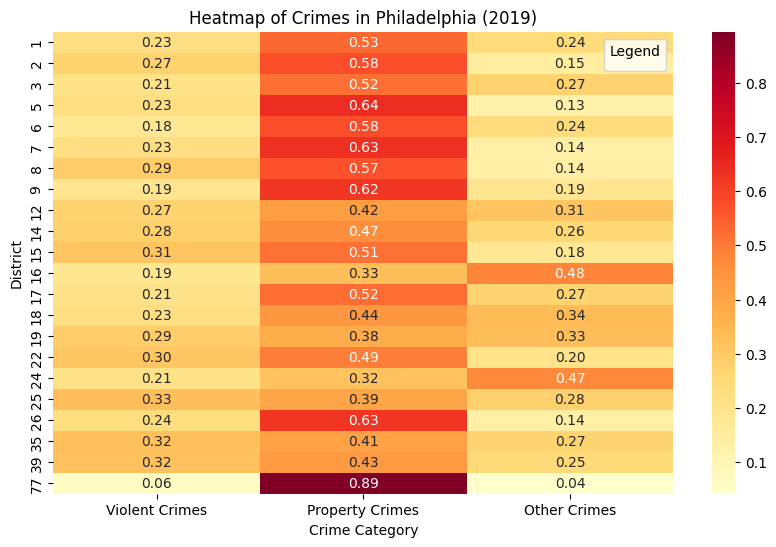

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt


violent_crimes = df_2019[df_2019['standardized_crime'] == 'Violent']
property_crimes = df_2019[df_2019['standardized_crime'] == 'Property']
other_crimes = df_2019[df_2019['standardized_crime'] == 'Other']


heatmap_data = pd.DataFrame({'Violent Crimes': violent_crimes['dc_dist'].value_counts(),
                             'Property Crimes': property_crimes['dc_dist'].value_counts(),
                             'Other Crimes': other_crimes['dc_dist'].value_counts()}).fillna(0)


heatmap_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0)


plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt='.2f')
plt.xlabel('Crime Category')
plt.ylabel('District')
plt.title('Heatmap of Crimes in Philadelphia (2019)')
plt.legend(title='Legend', labels=['Violent Crimes', 'Property Crimes', 'Other Crimes'])
plt.show()


**So from the heatmap it is visible that Property Crimes are the highest in district 77.**

**Now doing the yearly analysis of all years**

**Starting with the Covid-Year 2020.**

In [102]:
df['dispatch_date']=pd.to_datetime(df['dispatch_date'])
df_2020=df[df['dispatch_date'].dt.year==2020]
df_2020['month']=df_2020['dispatch_date'].dt.month
crime_month2020=df_2020['month'].value_counts().sort_index()
crime_month2020

1     13037
2     12690
3     11193
4      9021
5     12130
6     10807
7     10254
8     10913
9     11290
10    12633
11    10132
12    10290
Name: month, dtype: int64

**Bar-Graph of crimes per month in 202**

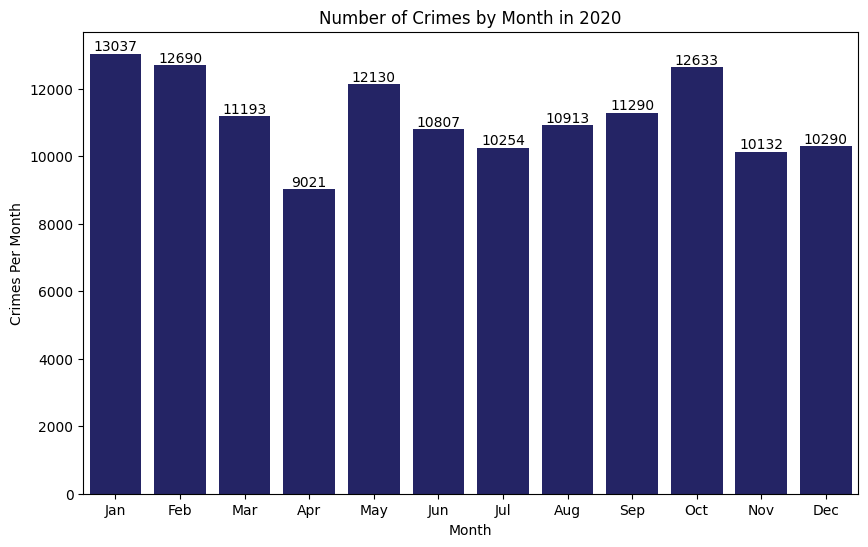

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sns.barplot(x=crime_month2020.index, y=crime_month2020.values, color='#191970')
plt.xlabel('Month')
plt.ylabel('Crimes Per Month')
plt.title('Number of Crimes by Month in 2020')


for i, v in enumerate(crime_month2020.values):
    plt.text(i, v, str(int(v)), ha='center', va='bottom')


month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(len(month_names)), month_names)


plt.show()


**The low dip from march shows the lockdown during Covid times lets dig more into March and
April**

In [104]:
start_date = '2020-03-01'
end_date = '2020-04-30'
lockdown_df = df[(df['dispatch_date'] >= start_date) & (df['dispatch_date'] <= end_date)]


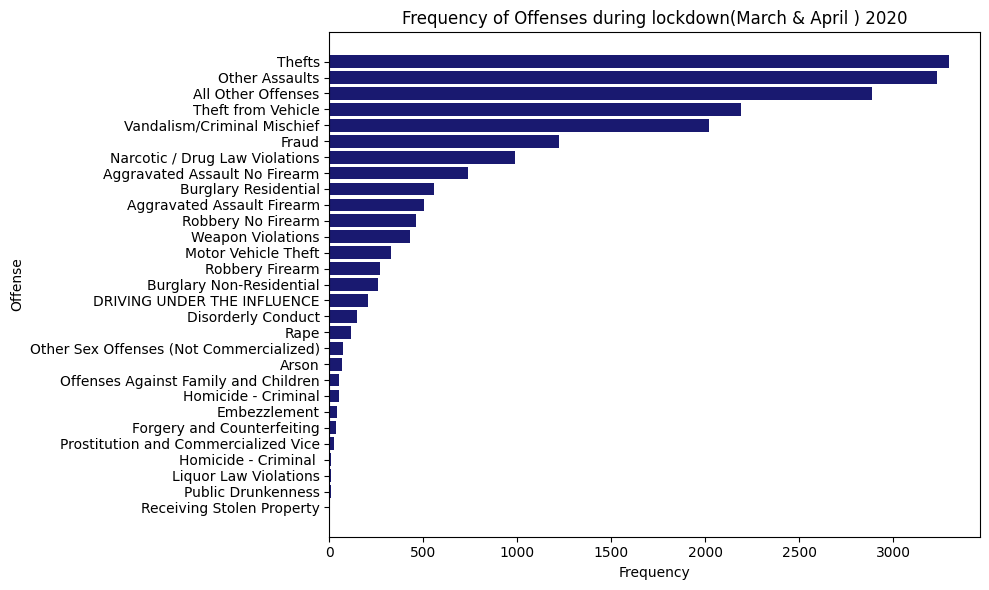

In [105]:
offense_counts = lockdown_df['text_general_code'].value_counts()

offense_counts = offense_counts.sort_values(ascending=True)


plt.figure(figsize=(10, 6))
plt.barh(offense_counts.index, offense_counts.values, color='#191970')
plt.xlabel('Frequency')
plt.ylabel('Offense')
plt.title('Frequency of Offenses during lockdown(March & April ) 2020')
plt.tight_layout()
plt.show()

**Which Category was at the peak during Covid**

In [106]:
crime_counts=lockdown_df['standardized_crime'].value_counts()
print(crime_counts)

Property    10559
Violent      5582
Other        4073
Name: standardized_crime, dtype: int64


In [107]:
lockdown_df['Hour']=lockdown_df['dispatch_time'].dt.hour

**Most of the crime commited was theft lets see the timings**

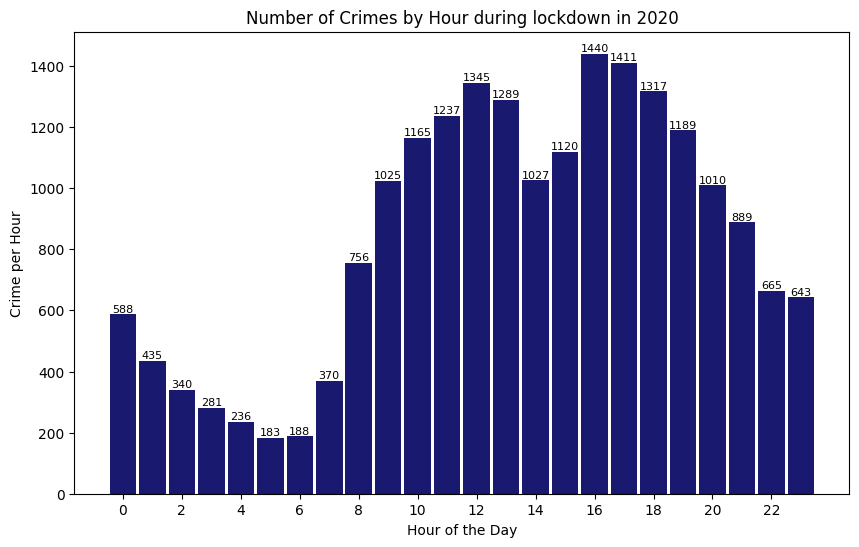

In [108]:
crime_count_by_hour=lockdown_df['hour'].value_counts().sort_index()
plt.figure(figsize=(10,6))


tick_locations = np.arange(0, 24, 2)

bars=plt.bar(crime_count_by_hour.index,crime_count_by_hour.values,color='#191970',width=0.9)
plt.xlabel('Hour of the Day')
plt.ylabel('Crime per Hour')
plt.title('Number of Crimes by Hour during lockdown in 2020')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)),
             ha='center', va='bottom',fontsize=8)


plt.xticks(tick_locations)


plt.show()

**So its the same as 2019 4pm to 6pm most crimes happen.**

***Now looking if the police districts are also the same in it***

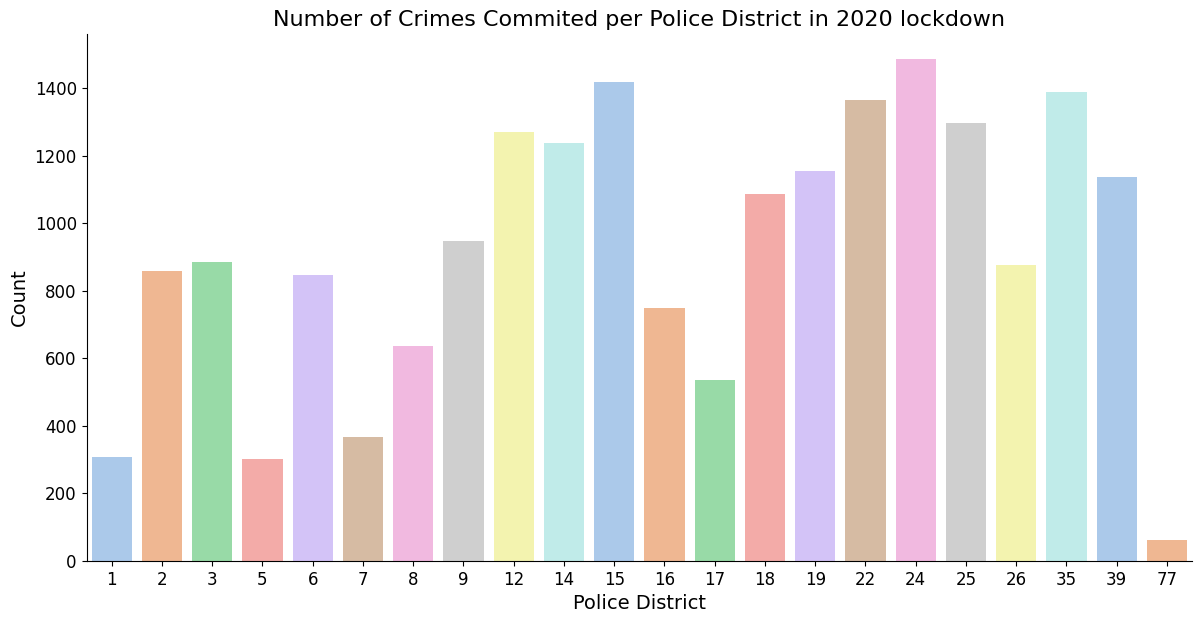

In [109]:
sns.catplot(x='dc_dist', kind='count',height=6,aspect=2,palette=("pastel"), data=lockdown_df)
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel("Police District", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Number of Crimes Commited per Police District in 2020 lockdown", fontsize=16)
plt.show()



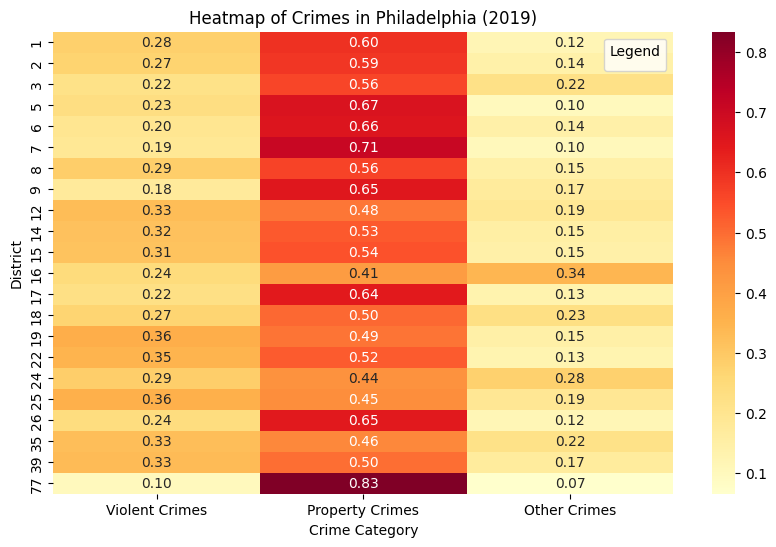

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt


violent_crimes = df_2020[df_2020['standardized_crime'] == 'Violent']
property_crimes = df_2020[df_2020['standardized_crime'] == 'Property']
other_crimes = df_2020[df_2020['standardized_crime'] == 'Other']

heatmap_data = pd.DataFrame({'Violent Crimes': violent_crimes['dc_dist'].value_counts(),
                             'Property Crimes': property_crimes['dc_dist'].value_counts(),
                             'Other Crimes': other_crimes['dc_dist'].value_counts()}).fillna(0)


heatmap_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0)


plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt='.2f')
plt.xlabel('Crime Category')
plt.ylabel('District')
plt.title('Heatmap of Crimes in Philadelphia (2019)')
plt.legend(title='Legend', labels=['Violent Crimes', 'Property Crimes', 'Other Crimes'])
plt.show()



**Now looking at 2021**

In [111]:
df_2021=df[df['dispatch_date'].dt.year==2021]
df_2021['month']=df['dispatch_date'].dt.month
crime_month2021=df_2021['month'].value_counts().sort_index()
crime_month2021

1     11028
2      8631
3     10620
4     10367
5     10905
6     11124
7     11832
8     11737
9     12077
10    13090
11    11492
12    11394
Name: month, dtype: int64

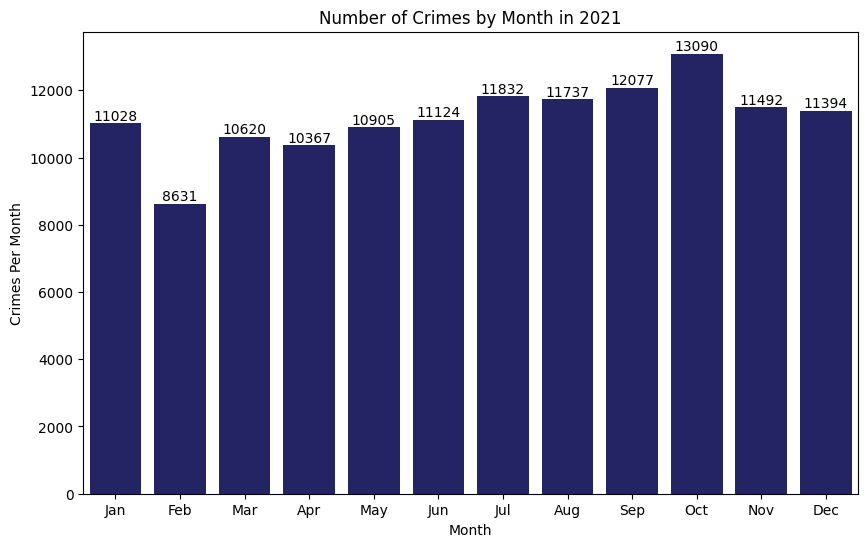

In [112]:

plt.figure(figsize=(10, 6))
sns.barplot(x=crime_month2021.index, y=crime_month2021.values, color='#191970')
plt.xlabel('Month')
plt.ylabel('Crimes Per Month')
plt.title('Number of Crimes by Month in 2021')


for i, v in enumerate(crime_month2021.values):
    plt.text(i, v, str(int(v)), ha='center', va='bottom')


month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(len(month_names)), month_names)

plt.show()


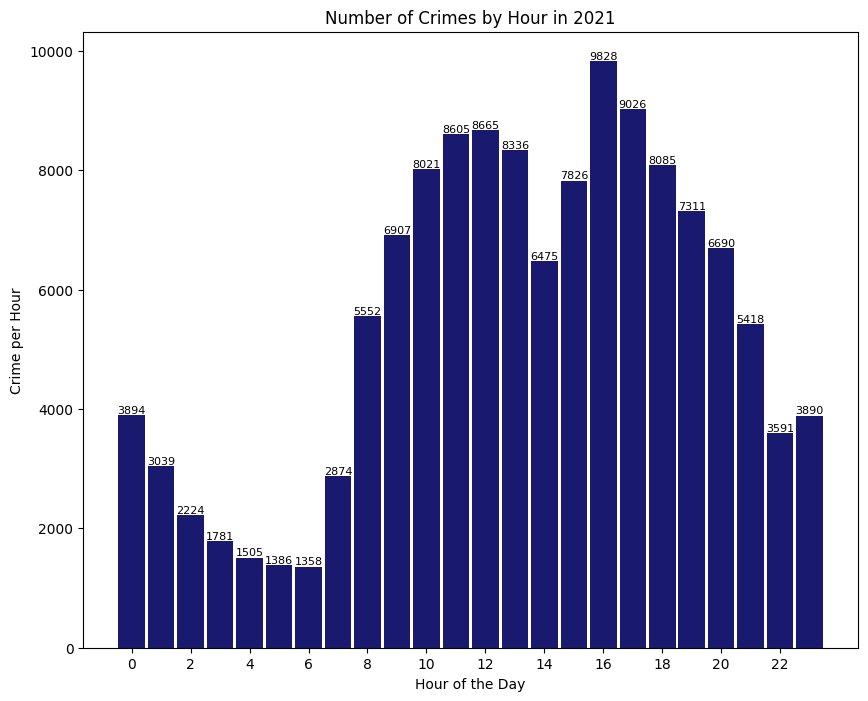

In [113]:
crime_count_by_hour=df_2021['hour'].value_counts().sort_index()
plt.figure(figsize=(10,8))


tick_locations = np.arange(0, 24, 2)

bars=plt.bar(crime_count_by_hour.index,crime_count_by_hour.values,color='#191970',width=0.9)
plt.xlabel('Hour of the Day')
plt.ylabel('Crime per Hour')
plt.title('Number of Crimes by Hour in 2021')


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)),
             ha='center', va='bottom',fontsize=8)


plt.xticks(tick_locations)

plt.show()



Text(0.5, 1.0, 'Number of Crimes Commited per Police District in 2021')

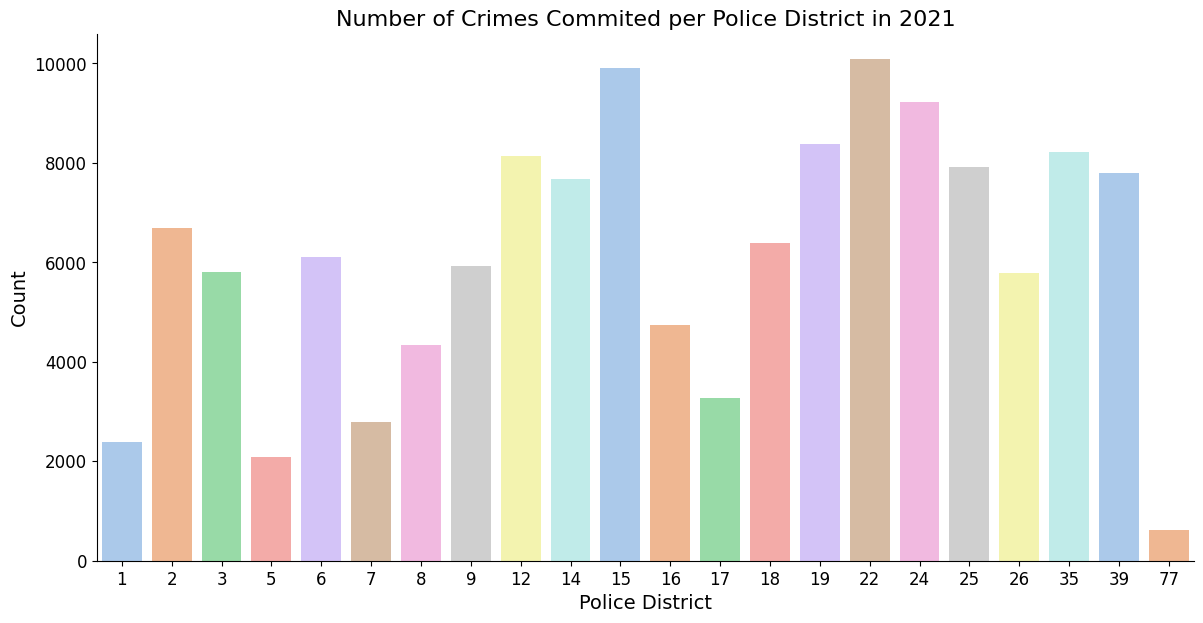

In [114]:
sns.catplot(x='dc_dist', kind='count', height=6, aspect=2,palette=("pastel"),data=df_2021)
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel("Police District", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Number of Crimes Commited per Police District in 2021", fontsize=16)


**In 2021 the 21st  Police district had the most number of crimes unlike previous years**

***Categories of crimes in 2021***

In [115]:
crime_counts=df_2021['standardized_crime'].value_counts()
print(crime_counts)

Property    77431
Violent     40622
Other       16244
Name: standardized_crime, dtype: int64


**Property crimes were still the highest in 2021**

***Crime categories per police district in 2021***

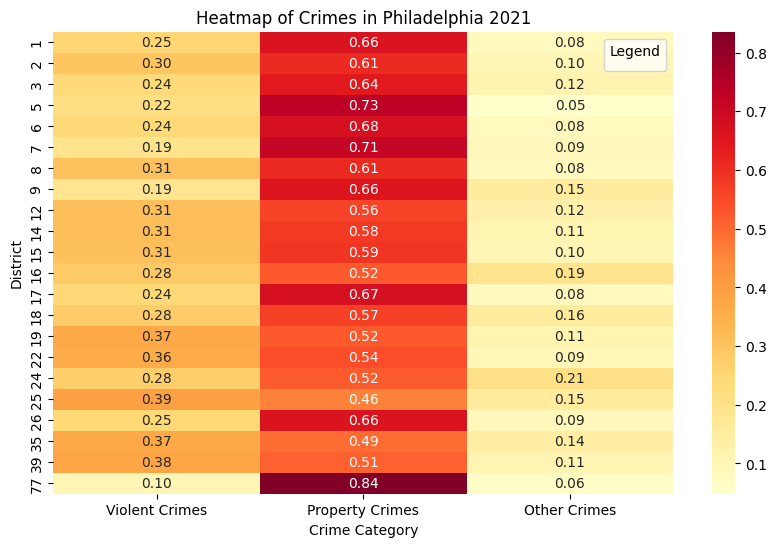

In [116]:
violent_crimes = df_2021[df_2021['standardized_crime'] == 'Violent']
property_crimes = df_2021[df_2021['standardized_crime'] == 'Property']
other_crimes = df_2021[df_2021['standardized_crime'] == 'Other']

heatmap_data = pd.DataFrame({'Violent Crimes': violent_crimes['dc_dist'].value_counts(),
                             'Property Crimes': property_crimes['dc_dist'].value_counts(),
                             'Other Crimes': other_crimes['dc_dist'].value_counts()}).fillna(0)


heatmap_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0)


plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt='.2f')
plt.xlabel('Crime Category')
plt.ylabel('District')
plt.title('Heatmap of Crimes in Philadelphia 2021')
plt.legend(title='Legend', labels=['Violent Crimes', 'Property Crimes', 'Other Crimes'])
plt.show()

**The heatmap shows that 25th district had the most number of violent crimes**

In [117]:
df_2022=df[df['dispatch_date'].dt.year==2022]
df_2022['month']=df['dispatch_date'].dt.month
crime_month2022=df_2022['month'].value_counts().sort_index()
crime_month2022

1     10513
2     10400
3     11898
4     12125
5     13121
6     13477
7     13736
8     13780
9     13002
10    13073
11    12555
12    12585
Name: month, dtype: int64

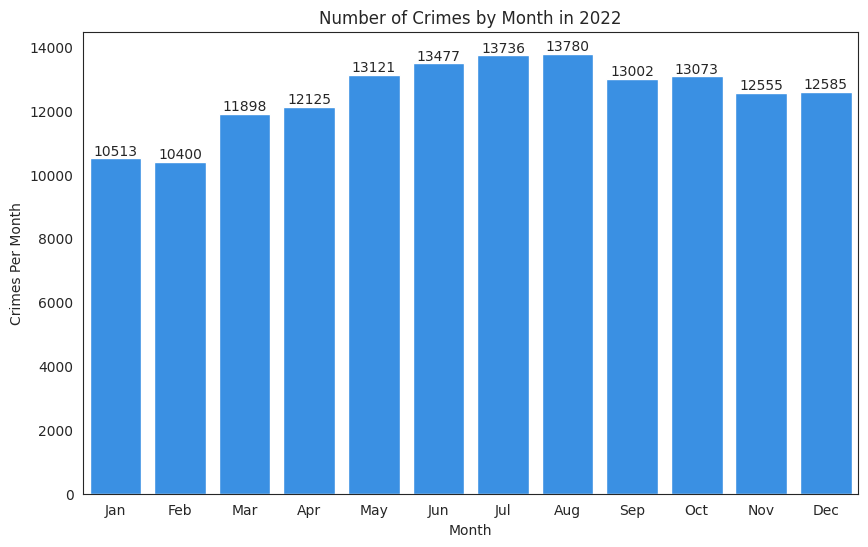

In [118]:
sns.set_style('white')

plt.figure(figsize=(10, 6))
sns.barplot(x=crime_month2022.index, y=crime_month2022.values, color='#1E90FF')
plt.xlabel('Month')
plt.ylabel('Crimes Per Month')
plt.title('Number of Crimes by Month in 2022')

for i, v in enumerate(crime_month2022.values):
    plt.text(i, v, str(int(v)), ha='center', va='bottom')

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(len(month_names)), month_names)

plt.show()




**From the last 4 years it shows that the most crimes happen in summers from March to Oct**

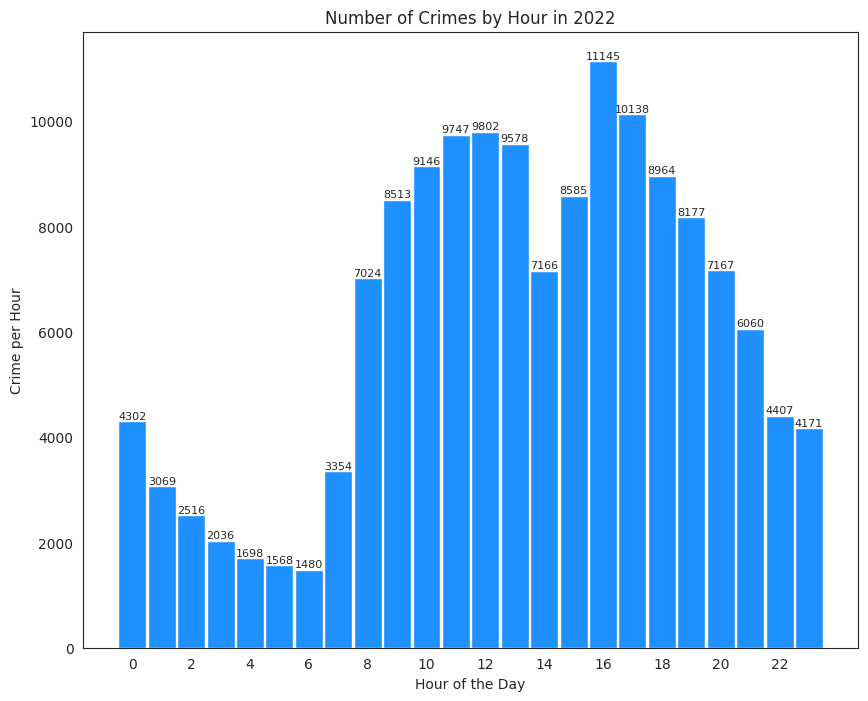

In [119]:
crime_count_by_hour=df_2022['hour'].value_counts().sort_index()
plt.figure(figsize=(10,8))
sns.set_style('white')
tick_locations = np.arange(0, 24, 2)

bars=plt.bar(crime_count_by_hour.index,crime_count_by_hour.values,color='#1E90FF',width=0.95)
plt.xlabel('Hour of the Day')
plt.ylabel('Crime per Hour')
plt.title('Number of Crimes by Hour in 2022')


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)),
             ha='center', va='bottom',fontsize=8)


plt.xticks(tick_locations)

plt.show()


**Lets see like all other details if police districts still are similar to 2019 like all other stats of 2022**

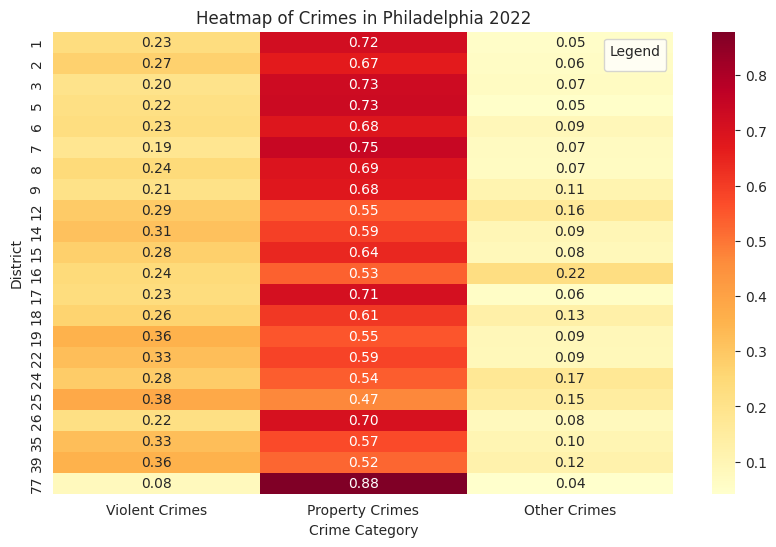

In [120]:

violent_crimes = df_2022[df_2022['standardized_crime'] == 'Violent']
property_crimes = df_2022[df_2022['standardized_crime'] == 'Property']
other_crimes = df_2022[df_2022['standardized_crime'] == 'Other']


heatmap_data = pd.DataFrame({'Violent Crimes': violent_crimes['dc_dist'].value_counts(),
                             'Property Crimes': property_crimes['dc_dist'].value_counts(),
                             'Other Crimes': other_crimes['dc_dist'].value_counts()}).fillna(0)


heatmap_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0)


plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt='.2f')
plt.xlabel('Crime Category')
plt.ylabel('District')
plt.title('Heatmap of Crimes in Philadelphia 2022')
plt.legend(title='Legend', labels=['Violent Crimes', 'Property Crimes', 'Other Crimes'])
plt.show()

In [121]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer


df['month'] = df['dispatch_date'].dt.month


X = df[['Police_district', 'hour', 'lat', 'lng']]
y = df['month']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


model = LinearRegression()


model.fit(X_train_imputed, y_train)


y_pred = model.predict(X_test_imputed)


mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 11.858422232363381


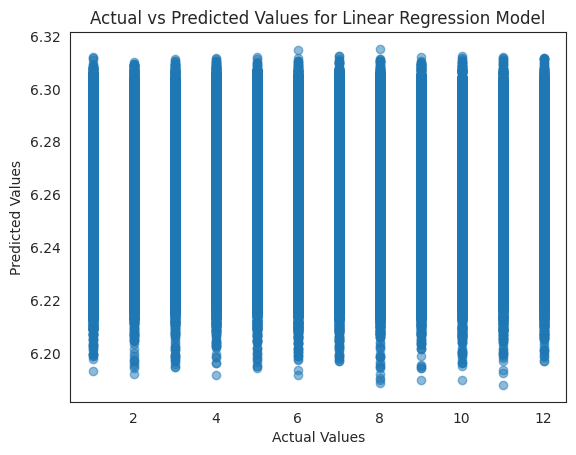

In [122]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Linear Regression Model')
plt.show()
